In [1]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal

48000
Duration:  9.498666666666667


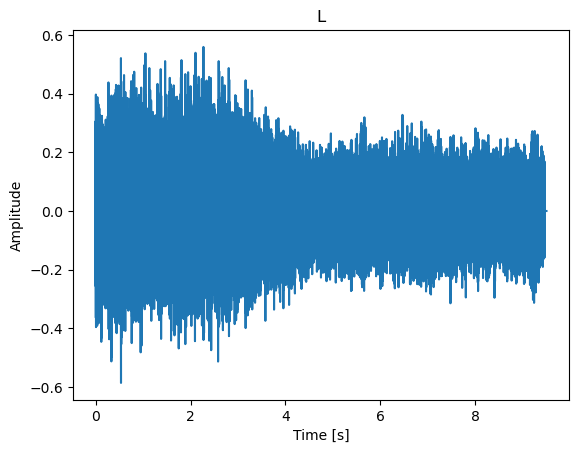

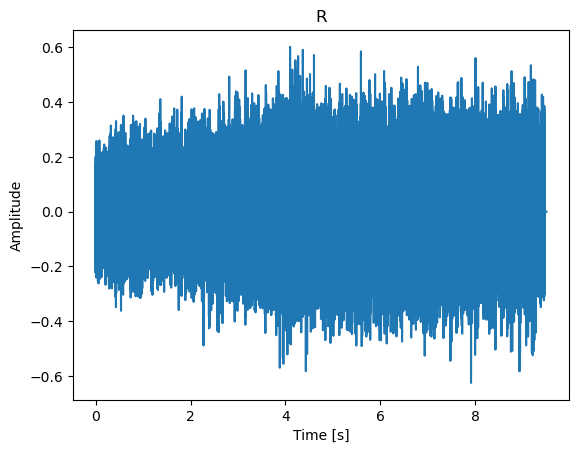

In [27]:
file_path="/home/neel/Acoustic/drone_localization/data/train/3m_train.wav"
file,sample_rate=librosa.load(file_path,sr=48000,mono=False)
file1=file[0][2784000:3360000]
file2=file[1][2784000:3360000]
print(sample_rate)
duration = len(file1)/sample_rate
time = np.arange(0,duration,1/sample_rate) 
time=time[:-1]
print("Duration: ",duration)
plt.plot(time,file1[:-1])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('L')
plt.show()

plt.plot(time,file2[:-1])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('R')
plt.show()

23620801

Duration:  12.0


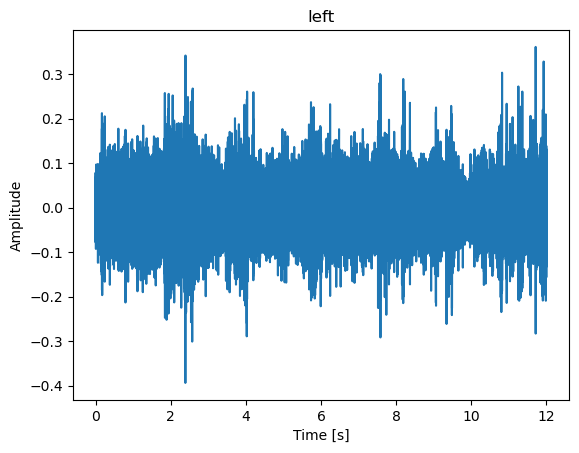

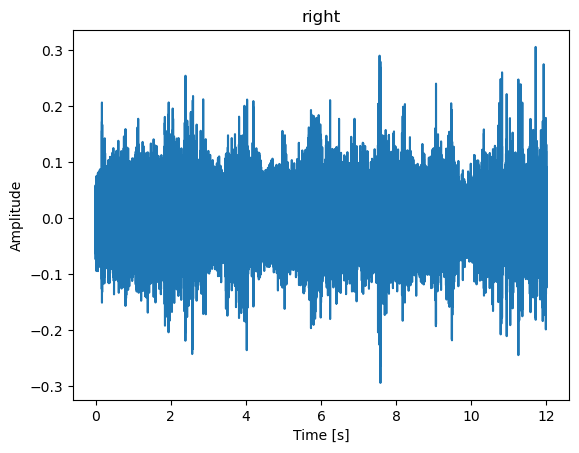

In [19]:
# file_path="/home/neel/Acoustic/Acoustics/dataset2/datachunks/channel1_new_video3_15.wav"
# file,sample_rate=librosa.load(file_path,sr=48000,mono=False)
# print(file.shape)
# print(sample_rate)
# file1=file[0]
# file2=file[1]
duration = len(file1)/sample_rate
time = np.arange(0,duration,1/sample_rate) 
print("Duration: ",duration)
plt.plot(time,file1)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('left')
plt.show()

duration = len(file2)/sample_rate
time = np.arange(0,duration,1/sample_rate) 
plt.plot(time,file2)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('right')
plt.show()

In [4]:
window_size=int(521)
wd = np.hamming(window_size)
slide_size = int(4)
overlap = window_size - slide_size
frequency,time,spectrum1=signal.spectrogram(file,nfft=window_size,fs=sample_rate,window=wd,noverlap=overlap,mode='magnitude')
print(spectrum1.shape)
# plt.colorbar(label="magnitude")
# plt.xlabel("time")
# plt.ylabel("frequency")
# plt.show()

(261, 270)


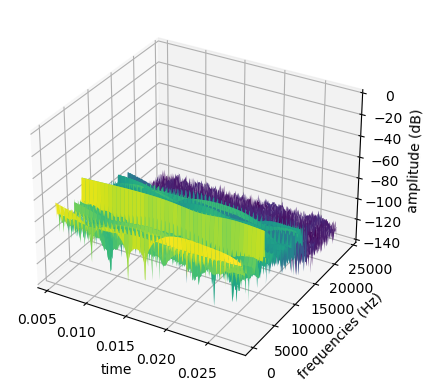

In [5]:
from matplotlib import mlab
spectrum,frequency,time=mlab.specgram(file,NFFT=window_size,Fs=sample_rate,window=wd,noverlap=overlap,mode='magnitude')
X, Y, Z = time[None, :], frequency[:, None],  20.0 * np.log10(spectrum)
ax=plt.axes(projection="3d")
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('time')
ax.set_ylabel('frequencies (Hz)')
ax.set_zlabel('amplitude (dB)')
ax.set_zlim(-140, 0)
plt.show()

In [5]:
print(spectrum1)

[[6.53249526e-06 7.89694604e-06 6.85062969e-06 ... 1.42920426e-05
  1.58551429e-05 1.53265937e-05]
 [3.70892994e-05 3.67187240e-05 3.62827959e-05 ... 5.35646832e-05
  5.36077496e-05 5.26640506e-05]
 [8.82722088e-05 8.82561872e-05 8.82565291e-05 ... 1.03352206e-04
  1.02455830e-04 1.01703503e-04]
 ...
 [5.28716875e-08 5.16101437e-08 5.51736328e-08 ... 4.09952747e-08
  7.52394413e-08 3.51507339e-08]
 [9.08239528e-08 2.63762274e-08 1.27872264e-08 ... 5.85921178e-08
  1.80154647e-08 1.01689075e-07]
 [6.04306436e-08 5.03338029e-08 5.67922491e-08 ... 3.34214789e-08
  6.69260700e-08 4.14220906e-08]]


In [28]:
frame_size=1024
hop_size=256
# file1,sample_rate=librosa.load("/home/neel/Acoustic/Acoustics/dataset/datachunks/channel1_3m_train20_30.wav",sr=None)
# file2,sample_rate=librosa.load("/home/neel/Acoustic/Acoustics/dataset/datachunks/channel2_3m_train20_1.wav",sr=None)
spec1=librosa.stft(file1,n_fft=frame_size,hop_length=hop_size)
# spec1=spec[0]
# spec2=spec[1]
spec2=librosa.stft(file2,n_fft=frame_size,hop_length=hop_size)
spec1=np.abs(spec1)**2   #uncomment if you want data with more clear seperation
spec2=np.abs(spec2)**2
print(spec1.shape)

(513, 1782)


In [29]:
def plot_spectrogram(Y, sr, hop_length,img_name, title,y_axis="linear"):
    plt.figure(figsize=(25, 10))
    # plt.axis('off')
    plt.title(title)
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")
    plt.savefig(img_name+".jpg",bbox_inches='tight', pad_inches=0)
    print(img_name)
    # plot_spectrogram(spec, sample_rate, hop_size)

tmp
tmp2


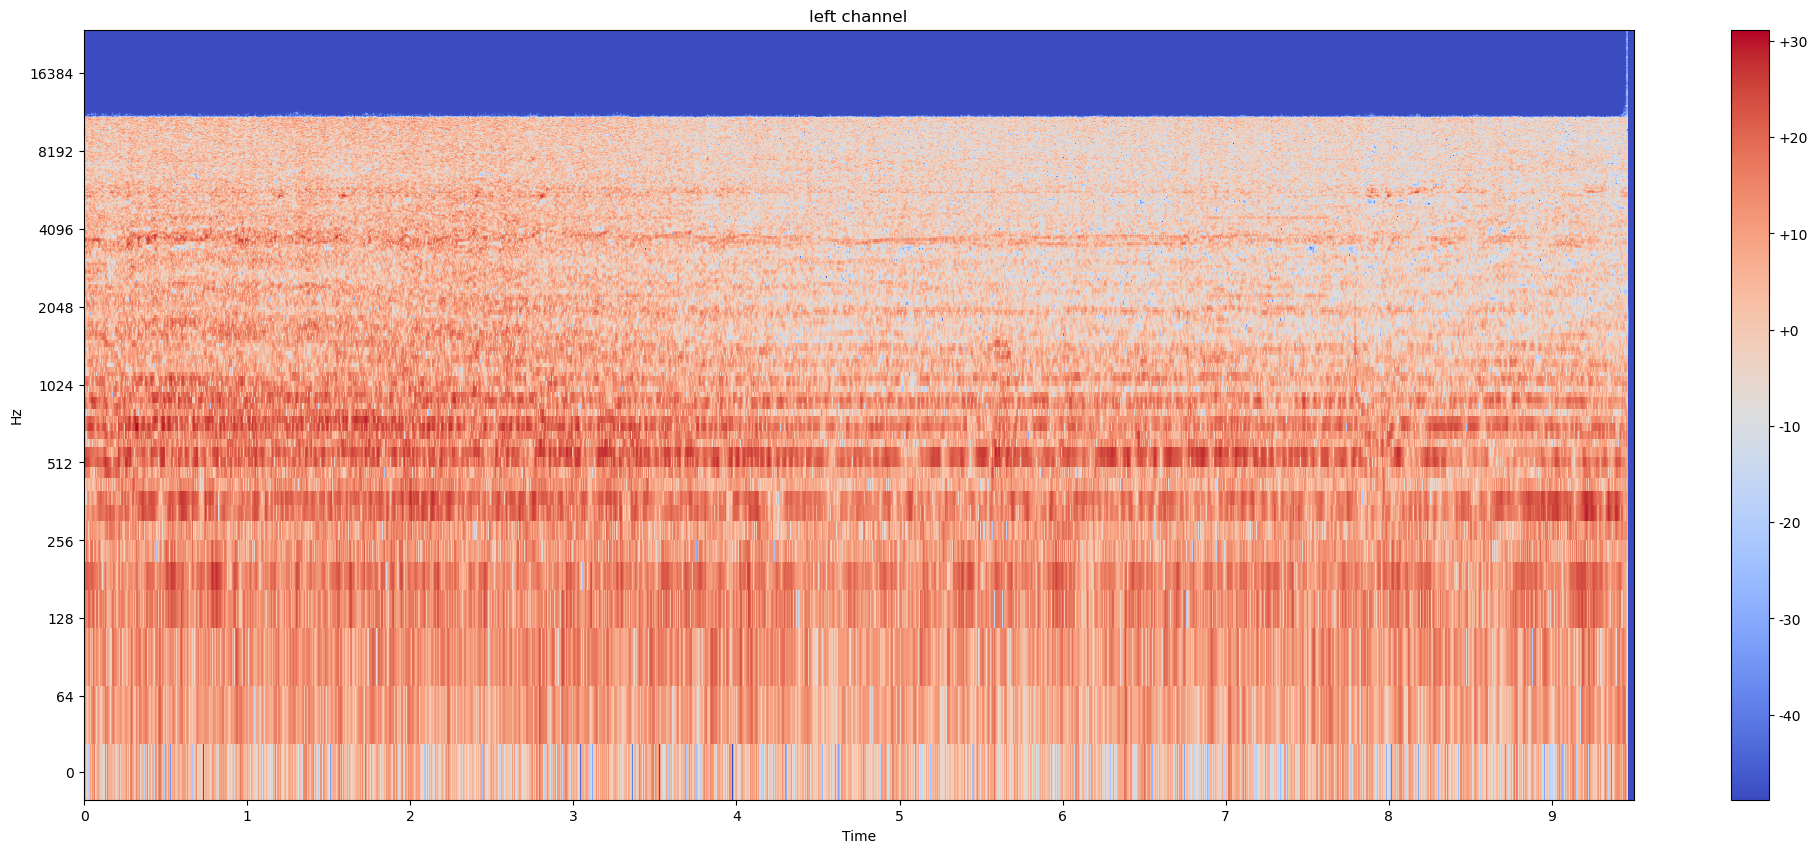

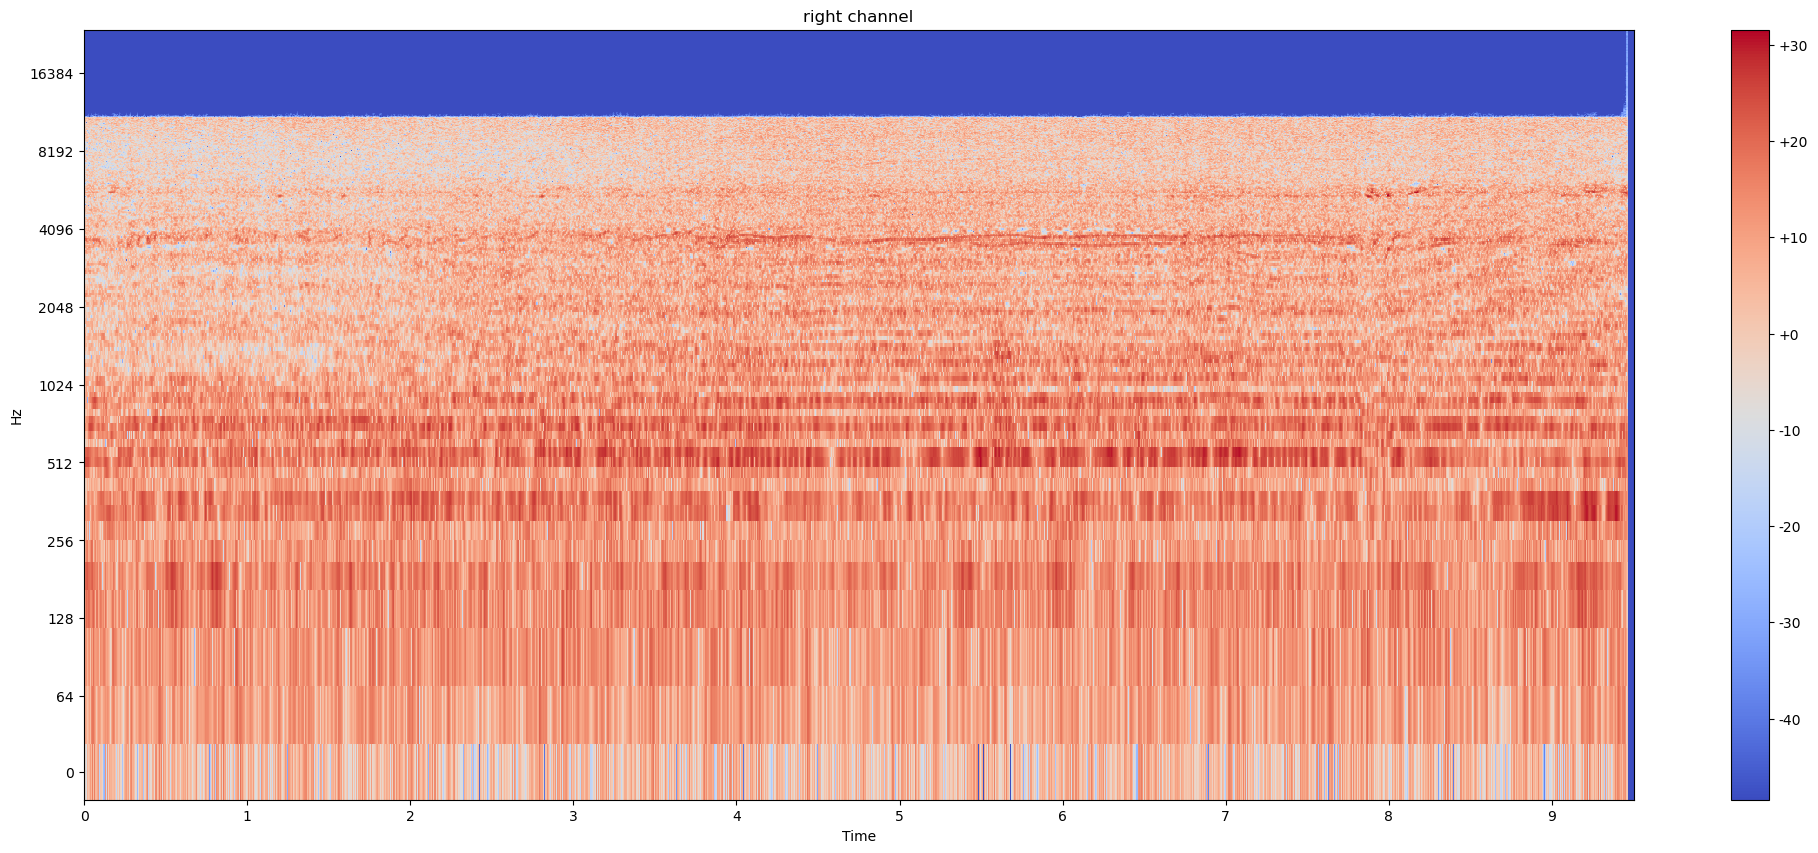

In [32]:
spec_log1 =librosa.power_to_db(spec1)
plot_spectrogram(spec_log1, sample_rate, hop_size, "tmp",title="left channel",y_axis="log")

spec_log2 =librosa.power_to_db(spec2)
plot_spectrogram(spec_log2, sample_rate, hop_size, "tmp2",title="right channel",y_axis="log" )

In [33]:
filter_banks=librosa.filters.mel(n_fft=frame_size,sr=sample_rate,n_mels=80)

/tmp/ipykernel_58124/3088231830.py:1: FutureWarning: Pass y=[-0.10418701 -0.1328125  -0.16549683 ...  0.          0.
  0.        ], sr=48000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec1=librosa.feature.melspectrogram(file1,sample_rate,n_fft=frame_size,hop_length=hop_size,n_mels=10)
/tmp/ipykernel_58124/3088231830.py:2: FutureWarning: Pass y=[-0.11227417 -0.177948   -0.22384644 ...  0.          0.
  0.        ], sr=48000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec2=librosa.feature.melspectrogram(file2,sample_rate,n_fft=frame_size,hop_length=hop_size,n_mels=10)


(10, 1782)
tmp1
tmp2


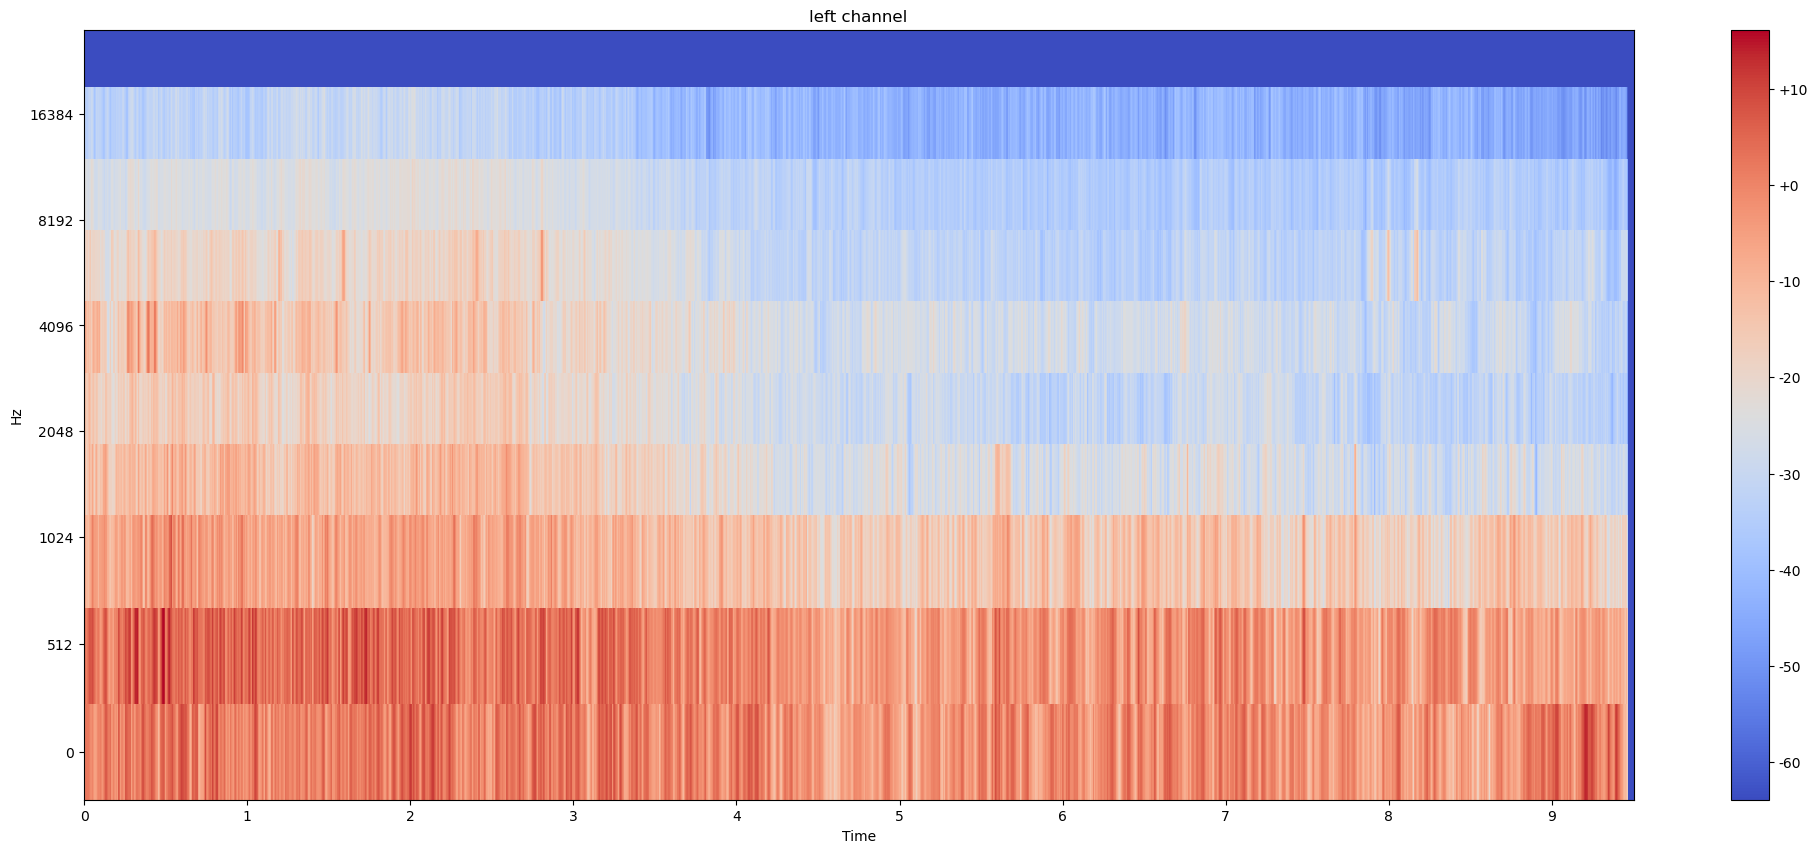

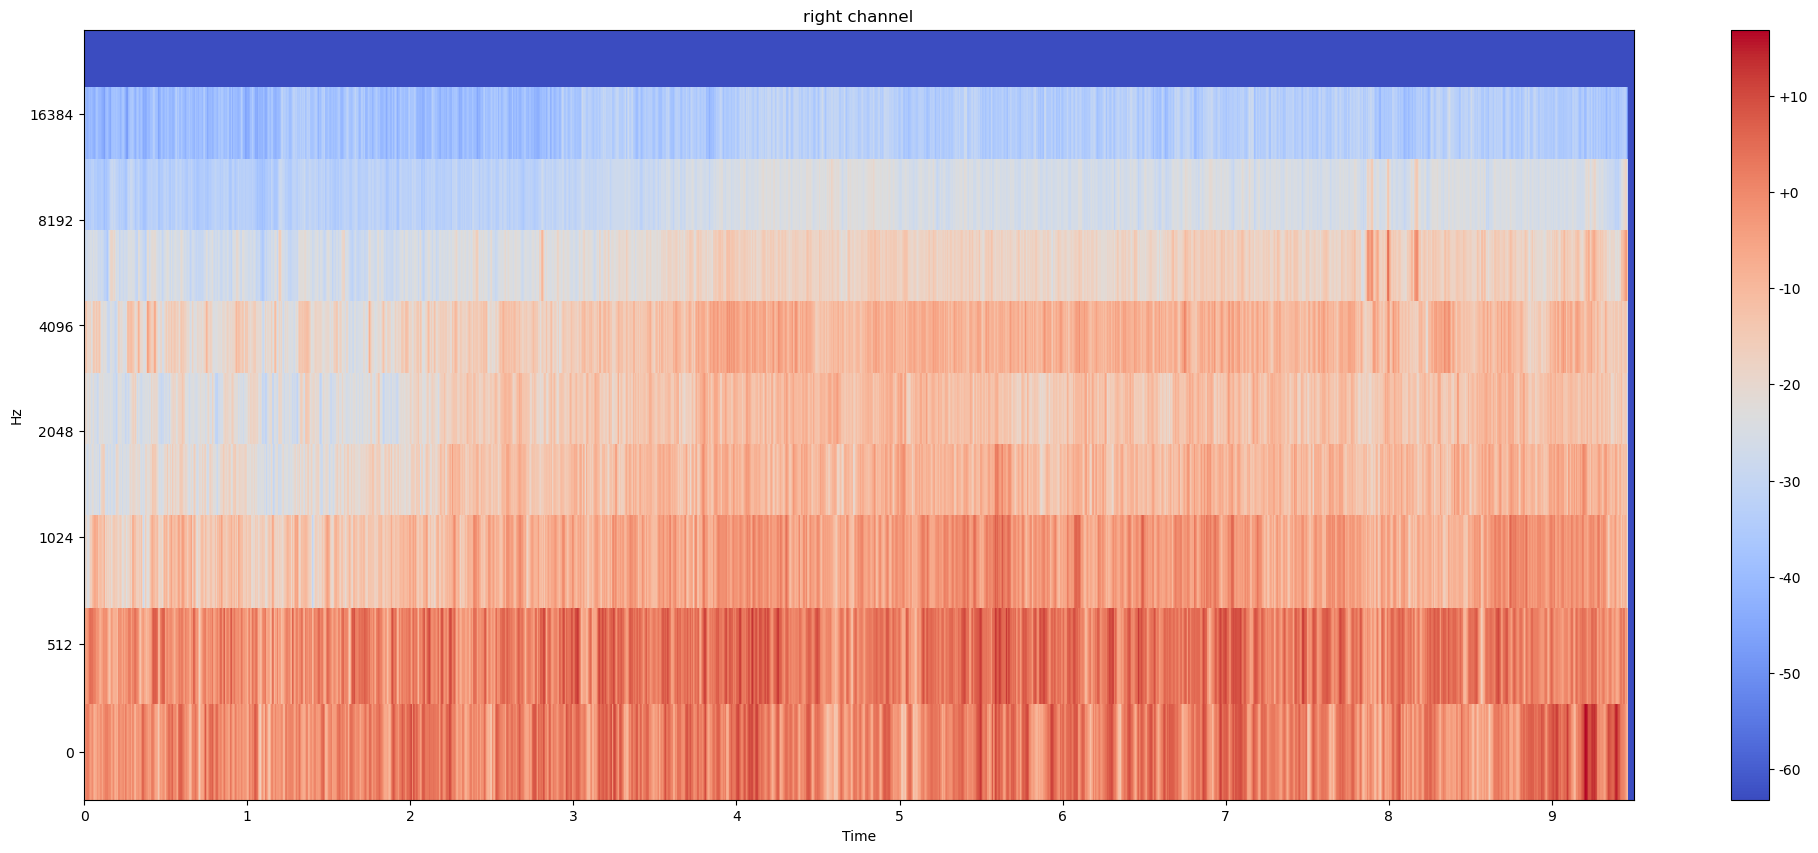

In [34]:
mel_spec1=librosa.feature.melspectrogram(file1,sample_rate,n_fft=frame_size,hop_length=hop_size,n_mels=10)
mel_spec2=librosa.feature.melspectrogram(file2,sample_rate,n_fft=frame_size,hop_length=hop_size,n_mels=10)

mel_spec1=np.abs(mel_spec1)**2
mel_spec2=np.abs(mel_spec2)**2    #uncomment if you want data with more clear seperation

log_mel1=librosa.power_to_db(mel_spec1)
log_mel2=librosa.power_to_db(mel_spec2)
print(mel_spec1.shape)

plot_spectrogram(log_mel1, sample_rate, hop_size, "tmp1",title="left channel",y_axis="mel" )
plot_spectrogram(log_mel2, sample_rate, hop_size, "tmp2",title="right channel",y_axis="mel" )

## Bounding Box Configuration

625.00032 617.000274 162.99936 96.00001200000001


FileNotFoundError: [Errno 2] No such file or directory: '/home/neel/Acoustic/yolov5_training/img_data/frames/3m_train0_2.jpg'

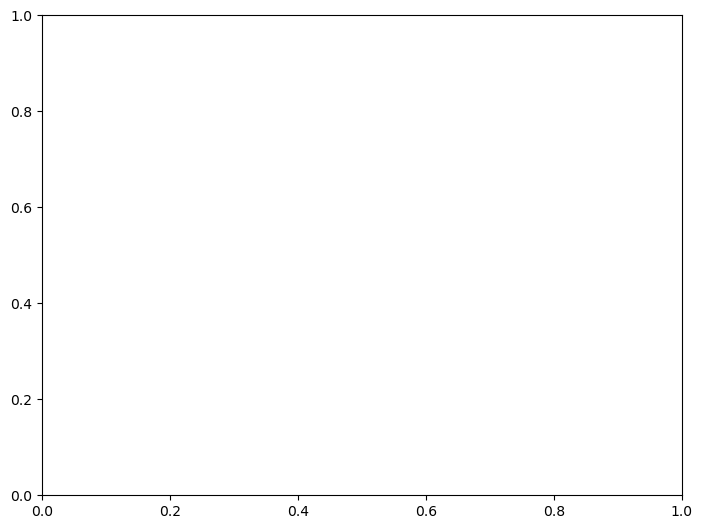

In [6]:
from matplotlib import patches
import matplotlib.pyplot as plt
import cv2
fig = plt.figure()
x_center=0.490625 *1440 
y_center=0.615741*1080
width= 0.113194*1440
height= 0.0888889*1080
xmin=x_center-(width/2)
ymin=y_center-(height/2)
ax = fig.add_axes([0,0,1,1])
print(xmin,ymin,width,height)
image = plt.imread('/home/neel/Acoustic/yolov5_training/img_data/frames/3m_train0_2.jpg')
plt.imshow(image)
rect = patches.Rectangle((xmin,ymin), width, height, edgecolor='r', facecolor='none')
ax.add_patch(rect)





In [2]:
import tensorflow as tf
from keras import backend as K
import numpy as np


2023-01-13 12:21:03.725489: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-13 12:21:03.882983: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-13 12:21:03.930112: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-01-13 12:21:04.539364: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:

def iou_loss_func(y_true, y_pred):
  # Convert the predicted and ground truth bounding boxes to a format
  # suitable for calculating the IOU
  y_true = tf.convert_to_tensor(y_true, dtype=tf.float32)
  y_pred = tf.convert_to_tensor(y_pred, dtype=tf.float32)

  # Calculate the IOU between the predicted and ground truth bounding boxes
  x1_true, y1_true, x2_true, y2_true = tf.split(y_true, 4, axis=-1)
  x1_pred, y1_pred, x2_pred, y2_pred = tf.split(y_pred, 4, axis=-1)
  x1_true, x2_true, x1_pred, x2_pred= x1_true*1920 , x2_true*1920, x1_pred*1920, x2_pred*1920
  y1_true, y2_true, y1_pred, y2_pred= y1_true*1080 , y2_true*1080, y1_pred*1080, y2_pred*1080
  area_true = (x2_true - x1_true + 1) * (y2_true - y1_true + 1)
  area_pred = (x2_pred - x1_pred + 1) * (y2_pred - y1_pred + 1)
  x1_true = K.maximum(x1_true, x1_pred)
  y1_true = K.maximum(y1_true, y1_pred)
  x2_true = K.minimum(x2_true, x2_pred)
  y2_true = K.minimum(y2_true, y2_pred)
  intersection = K.maximum(0.0, x2_true - x1_true + 1) * K.maximum(0.0, y2_true - y1_true + 1)
  iou = intersection / (area_true + area_pred - intersection)
  return 1-iou

box1=[185.0 ,390.0 ,260.0 ,147.0]
box2=[68.21919679641724 ,379.95973348617554, 380.0877642631531 ,133.65959286689758]
box1[2]+=box1[0]
box1[3]+=box1[1]
box2[2]+=box2[0]
box2[3]+=box2[1]
print(iou_loss_func(box1,box2))
# print(iou_loss_func([39, 63, 203, 112], [54, 66, 198, 114]))

tf.Tensor([0.43494493], shape=(1,), dtype=float32)


2023-01-12 16:11:21.686496: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-12 16:11:22.228292: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 24719 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:19:00.0, compute capability: 8.6


In [7]:
def mean_average_precision(y_true, y_pred):
    y_true = tf.convert_to_tensor(y_true, dtype=tf.float32)
    y_pred = tf.convert_to_tensor(y_pred, dtype=tf.float32)
    
    # Calculate Intersection Over Union (IOU) for each pair of true and pred boxes
    iou = (iou_loss_func(y_true, y_pred))
    
    # Set the threshold for considering a prediction as a true positive
    threshold = 0.6
    # print("iou: ",iou)
    # Find the highest IOU for each true box
    best_iou = K.max(iou, axis=-1)
    # Find all predictions with IOU greater than the threshold
    true_positive = K.greater(iou, threshold)
    hit = tf.reduce_sum(tf.cast(true_positive, tf.float32))
    # Find the average precision for all true boxes
    precision = []
    for t in np.arange(0.3, 0.9, 0.05):
        true_positive_at_t = K.cast(K.greater(best_iou, t), dtype='float32')
        precision.append(K.mean(true_positive_at_t))
    len = tf.shape(true_positive)
    length = tf.cast(len[0], tf.float32)
    # return K.mean(K.stack(precision))
    return (hit/length*100)
box1=[[185.0, 390.0, 445.0, 537.0], [1430.0, 528.0, 1920.0, 722.0], [1171.0, 491.0, 1365.0, 586.0], [262.0, 432.0, 852.0, 631.0], [1220.0, 613.0, 1471.0, 738.0], [172.0, 647.0, 351.0, 743.0], [1630.0, 346.0, 1888.0, 477.0], [180.0, 617.0, 660.0, 809.0], [907.0, 945.0, 1278.0, 1080.0], [571.0, 524.0, 760.0, 622.0], [1002.0, 480.0, 1174.0, 562.0], [812.0, 516.0, 1024.0, 628.0], [0.0, 12.0, 158.0, 185.0], [531.0, 156.0, 672.0, 247.0], [988.0, 480.0, 1140.0, 564.0], [444.0, 0.0, 728.0, 174.0], [332.0, 600.0, 887.0, 831.0], [422.0, 632.0, 904.0, 817.0], [1022.0, 485.0, 1170.0, 567.0], [707.0, 396.0, 927.0, 515.0], [1190.0, 278.0, 1555.0, 468.0], [1257.0, 31.0, 1640.0, 247.0], [292.0, 539.0, 681.0, 732.0], [154.0, 343.0, 536.0, 539.0], [837.0, 62.0, 1018.0, 193.0], [794.0, 164.0, 1043.0, 335.0], [1706.0, 329.0, 1920.0, 442.0], [1675.0, 374.0, 1920.0, 508.0], [1205.0, 285.0, 1427.0, 423.0], [189.0, 33.0, 446.0, 198.0], [6.0, 588.0, 722.0, 802.0], [1084.0, 416.0, 1557.0, 651.0], [1004.0, 337.0, 1219.0, 446.0], [0.0, 156.0, 149.0, 295.0], [1628.0, 321.0, 1880.0, 442.0], [1244.0, 621.0, 1490.0, 751.0], [492.0, 175.0, 624.0, 257.0], [360.0, 390.0, 607.0, 518.0], [3.0, 24.0, 238.0, 191.0], [858.0, 312.0, 1066.0, 434.0], [988.0, 460.0, 1132.0, 546.0], [342.0, 451.0, 591.0, 584.0], [308.0, 493.0, 488.0, 581.0], [1304.0, 527.0, 1760.0, 722.0], [872.0, 286.0, 1132.0, 443.0], [637.0, 256.0, 1031.0, 479.0], [947.0, 74.0, 1456.0, 354.0], [1038.0, 477.0, 1174.0, 559.0], [189.0, 617.0, 652.0, 810.0], [536.0, 530.0, 732.0, 639.0], [500.0, 242.0, 714.0, 390.0], [1084.0, 237.0, 1561.0, 489.0], [1228.0, 445.0, 1480.0, 579.0], [382.0, 241.0, 793.0, 462.0], [384.0, 604.0, 568.0, 703.0], [869.0, 734.0, 1258.0, 944.0], [513.0, 558.0, 815.0, 703.0], [357.0, 195.0, 562.0, 323.0], [1009.0, 387.0, 1157.0, 465.0], [715.0, 206.0, 951.0, 349.0], [837.0, 576.0, 1030.0, 678.0], [485.0, 485.0, 648.0, 571.0], [1640.0, 63.0, 1897.0, 202.0], [836.0, 62.0, 1019.0, 194.0], [1075.0, 591.0, 1295.0, 713.0], [488.0, 182.0, 673.0, 302.0], [6.0, 585.0, 736.0, 790.0], [1260.0, 242.0, 1636.0, 464.0], [346.0, 619.0, 883.0, 813.0], [244.0, 515.0, 479.0, 639.0], [1031.0, 400.0, 1178.0, 485.0], [1243.0, 47.0, 1408.0, 153.0], [1415.0, 240.0, 1673.0, 393.0], [1255.0, 489.0, 1424.0, 580.0], [41.0, 46.0, 572.0, 391.0], [20.0, 217.0, 565.0, 465.0], [812.0, 517.0, 1016.0, 630.0], [758.0, 58.0, 950.0, 181.0], [213.0, 9.0, 477.0, 176.0], [1222.0, 519.0, 1499.0, 660.0], [635.0, 529.0, 835.0, 633.0], [635.0, 319.0, 912.0, 440.0], [452.0, 108.0, 680.0, 262.0], [1176.0, 229.0, 1529.0, 439.0], [202.0, 162.0, 465.0, 316.0], [475.0, 624.0, 630.0, 713.0], [1035.0, 380.0, 1211.0, 465.0], [1009.0, 80.0, 1516.0, 372.0], [173.0, 650.0, 798.0, 852.0], [36.0, 53.0, 617.0, 356.0], [828.0, 63.0, 1011.0, 196.0], [1746.0, 508.0, 1920.0, 709.0], [307.0, 365.0, 806.0, 513.0], [1246.0, 525.0, 1658.0, 709.0], [1356.0, 457.0, 1642.0, 596.0], [789.0, 169.0, 1059.0, 349.0], [830.0, 224.0, 1263.0, 490.0], [826.0, 640.0, 1016.0, 749.0], [788.0, 452.0, 1218.0, 678.0], [794.0, 579.0, 976.0, 685.0]]
box2=[[68.21919679641724, 379.95973348617554, 448.3069610595703, 513.6193263530731], [1397.1185302734375, 549.3877100944519, 1889.3451690673828, 772.9480504989624], [1036.5289306640625, 468.90573263168335, 1419.9980163574219, 588.3002972602844], [468.08295249938965, 386.084246635437, 844.9310302734375, 515.9570968151093], [994.5221328735352, 577.9037976264954, 1461.3923263549805, 777.0281410217285], [174.17770385742188, 562.7021098136902, 610.5913925170898, 745.2941107749939], [1542.0278549194336, 356.8662357330322, 1902.7642822265625, 499.28364872932434], [253.40938568115234, 497.0616853237152, 664.7489547729492, 651.2385034561157], [1143.0342864990234, 96.39359503984451, 1681.0652160644531, 375.91102480888367], [567.2232627868652, 500.1382648944855, 810.6345176696777, 635.1990652084351], [934.4699478149414, 468.9425218105316, 1198.952407836914, 581.2007904052734], [745.594596862793, 492.64147996902466, 1022.8430557250977, 626.3628387451172], [11.526619791984558, 13.0398890376091, 222.877836227417, 177.81747043132782], [575.4428672790527, 231.84609711170197, 887.2957992553711, 437.72080421447754], [904.2319679260254, 502.2390139102936, 1173.6977005004883, 638.892080783844], [385.31052589416504, 11.464839242398739, 688.3535957336426, 169.5241016149521], [349.8654556274414, 581.1458158493042, 838.8861465454102, 778.5412931442261], [470.0101375579834, 568.7431311607361, 893.1057929992676, 759.316098690033], [931.820068359375, 471.65278673171997, 1192.8428649902344, 584.9274730682373], [148.59419345855713, 305.3539502620697, 692.8844833374023, 535.6948292255402], [1145.288314819336, 338.4187638759613, 1687.5487518310547, 543.7275838851929], [1145.5907821655273, 49.641484916210175, 1702.306137084961, 282.17493295669556], [206.84991359710693, 557.0299458503723, 751.9672393798828, 746.5094089508057], [105.37213325500488, 350.2323067188263, 614.2805099487305, 565.5717301368713], [784.5340347290039, 60.512807965278625, 1065.4875183105469, 279.46383118629456], [803.7538146972656, 220.6108009815216, 1112.197151184082, 432.3155629634857], [1324.0707778930664, 370.9193158149719, 1818.5181427001953, 503.3522164821625], [1490.207405090332, 371.48138880729675, 1892.3350524902344, 509.46253538131714], [1132.5059509277344, 276.14845991134644, 1597.6083755493164, 434.724143743515], [353.1030464172363, 48.45020994544029, 671.2109184265137, 268.3142638206482], [149.05786514282227, 567.525064945221, 765.7778549194336, 774.8214340209961], [878.7364196777344, 322.19714999198914, 1281.6633224487305, 535.4050862789154], [1047.638282775879, 436.8085741996765, 1503.5985946655273, 597.0552206039429], [41.6251266002655, 231.66137874126434, 321.7159652709961, 438.73448610305786], [1641.851806640625, 292.8166937828064, 1914.389877319336, 460.32609701156616], [1054.4873428344727, 566.1083436012268, 1551.9368362426758, 759.4761943817139], [220.88531970977783, 64.22015458345413, 578.4725189208984, 284.1459059715271], [428.78917694091797, 410.59980869293213, 710.8680725097656, 546.0841512680054], [120.27435779571533, 33.69607754051685, 502.1983337402344, 235.16891956329346], [758.792667388916, 315.20620822906494, 1041.3840866088867, 471.3221025466919], [913.4943580627441, 412.58954644203186, 1179.2923736572266, 531.7559731006622], [286.69386863708496, 500.8046543598175, 670.8193016052246, 641.7611217498779], [298.07684898376465, 471.887104511261, 631.9836616516113, 584.0762042999268], [1200.8361053466797, 455.0328326225281, 1746.6078186035156, 607.9215145111084], [804.2492866516113, 287.56144165992737, 1078.3069610595703, 453.9476001262665], [625.8217620849609, 225.8503621816635, 1020.1585006713867, 442.6216506958008], [801.3160514831543, 66.35702893137932, 1126.3967514038086, 291.5825021266937], [924.3396949768066, 479.1040599346161, 1200.4840850830078, 602.102837562561], [162.9376745223999, 498.04134607315063, 598.7837791442871, 661.7609167098999], [512.768383026123, 503.8273537158966, 774.5679473876953, 638.5960292816162], [547.1395683288574, 254.66159999370575, 812.6214408874512, 435.4057574272156], [1108.4737014770508, 268.39231610298157, 1639.4625091552734, 500.7771348953247], [1102.499771118164, 422.5790798664093, 1564.4573593139648, 550.0905346870422], [186.4698314666748, 196.8109381198883, 728.6618041992188, 457.382994890213], [474.8169708251953, 581.603057384491, 750.2735137939453, 758.4594869613647], [726.5361785888672, 554.4964814186096, 1038.3251953125, 720.8177518844604], [501.86330795288086, 500.8743703365326, 800.9614562988281, 643.6773133277893], [434.2262077331543, 225.1301085948944, 770.6583595275879, 429.2765772342682], [935.8366584777832, 397.26966977119446, 1188.2834243774414, 507.69710540771484], [640.3753852844238, 218.05099189281464, 955.7842826843262, 414.5873951911926], [784.9459648132324, 560.278787612915, 1071.3910675048828, 727.2260856628418], [479.4939708709717, 476.16353273391724, 727.895336151123, 590.3252792358398], [1419.3722534179688, 55.207200050354004, 1881.8709182739258, 270.695743560791], [779.3066024780273, 102.68475383520126, 1042.4116516113281, 329.9100995063782], [805.7953262329102, 610.7240581512451, 1123.216667175293, 816.398549079895], [458.04039001464844, 151.0959255695343, 736.5814590454102, 373.5128724575043], [159.38004970550537, 268.6013513803482, 658.8955307006836, 478.56393814086914], [1119.1324996948242, 225.5478411912918, 1632.0358657836914, 430.621200799942], [192.99234867095947, 249.79454934597015, 599.1487884521484, 489.1196322441101], [256.5293884277344, 493.8343119621277, 651.8095207214355, 634.9516153335571], [982.9375076293945, 426.88653588294983, 1288.1919479370117, 534.2911112308502], [1027.0905303955078, 24.793804362416267, 1481.7366027832031, 208.96852254867554], [1364.769515991211, 170.75341701507568, 1855.7954406738281, 380.2387583255768], [1181.6507720947266, 460.30160307884216, 1690.8381271362305, 588.8289284706116], [59.19116735458374, 226.98137998580933, 607.9349327087402, 486.7138195037842], [92.65511512756348, 175.07316827774048, 526.025218963623, 430.41221380233765], [736.2751007080078, 498.09786558151245, 1017.4242782592773, 632.571165561676], [547.9791641235352, 100.02364575862885, 775.0833892822266, 325.95685601234436], [374.8292827606201, 73.50212395191193, 685.39306640625, 304.54230308532715], [1112.8329849243164, 485.94523787498474, 1586.6293716430664, 628.2019114494324], [552.890567779541, 499.05399799346924, 796.2504386901855, 629.7828483581543], [547.2507476806641, 307.6018238067627, 821.8009185791016, 470.98047494888306], [451.11903190612793, 60.45056328177452, 701.9152450561523, 275.6910574436188], [1080.1698303222656, 255.91212630271912, 1577.8644561767578, 469.84248876571655], [410.48423767089844, 196.1009520292282, 689.3766975402832, 400.4802739620209], [436.84041023254395, 509.77339267730713, 740.5928993225098, 656.8862700462341], [954.0291023254395, 422.746707201004, 1231.2400817871094, 534.5434534549713], [447.26609230041504, 110.89515388011932, 1016.081428527832, 382.4793255329132], [367.51667976379395, 574.2649841308594, 979.6497344970703, 776.2398934364319], [261.4009952545166, 91.56768679618835, 616.3779258728027, 325.92087149620056], [748.3880424499512, 12.651550769805908, 1021.3208770751953, 164.02102947235107], [1545.5109786987305, 414.3496334552765, 1910.3077697753906, 617.3184943199158], [407.89661407470703, 164.8106288909912, 768.5092163085938, 405.6685781478882], [1101.4409637451172, 521.3852548599243, 1629.3368911743164, 691.5360760688782], [1393.7714767456055, 319.9680733680725, 1867.1503829956055, 481.508424282074], [766.8475914001465, 64.71102297306061, 1051.4336013793945, 282.38295435905457], [816.0779571533203, 117.01356768608093, 1224.3768310546875, 386.2674844264984], [820.1981163024902, 604.8116540908813, 1129.4562149047852, 804.0859866142273], [752.783203125, 353.05264949798584, 1113.0561447143555, 504.65686440467834], [843.9567375183105, 503.08407068252563, 1103.6371994018555, 641.6550350189209]]
# for i in range(len(box2)):
#     box1[i][2]+=box1[i][0]
#     box1[i][3]+=box1[i][1]
#     box2[i][2]+=box2[i][0]
#     box2[i][3]+=box2[i][1]
print(mean_average_precision(box1,box2))

tf.Tensor(60.000004, shape=(), dtype=float32)


In [11]:
def distance(y_true, y_pred):
  y_true = tf.convert_to_tensor(y_true, dtype=tf.float32)
  y_pred = tf.convert_to_tensor(y_pred, dtype=tf.float32)
  # x1_true, y1_true, x2_true, y2_true = tf.split(y_true, 4, axis=-1)
  # x1_pred, y1_pred, x2_pred, y2_pred = tf.split(y_pred, 4, axis=-1)
  # x1_true, x2_true, x1_pred, x2_pred= x1_true*1920 , x2_true*1920, x1_pred*1920, x2_pred*1920
  # y1_true, y2_true, y1_pred, y2_pred= y1_true*1080 , y2_true*1080, y1_pred*1080, y2_pred*1080

  # w_true,w_pred=x2_true-x1_true,x2_pred-x1_pred
  # h_true,h_pred=y2_true-y1_true,y2_pred-y1_pred

  # xc_true,xc_pred=x1_true+(w_true/2),x1_pred+(w_pred/2)
  # yc_true,yc_pred=y1_true+(h_true/2),y1_pred+(h_pred/2)
  # return K.mean(K.square(xc_true - xc_pred))
  print(y_pred.shape)
  return K.sum(K.abs(y_pred - y_true))/100
box1=[[185.0, 390.0, 445.0, 537.0], [1430.0, 528.0, 1920.0, 722.0], [1171.0, 491.0, 1365.0, 586.0], [262.0, 432.0, 852.0, 631.0], [1220.0, 613.0, 1471.0, 738.0], [172.0, 647.0, 351.0, 743.0], [1630.0, 346.0, 1888.0, 477.0], [180.0, 617.0, 660.0, 809.0], [907.0, 945.0, 1278.0, 1080.0], [571.0, 524.0, 760.0, 622.0], [1002.0, 480.0, 1174.0, 562.0], [812.0, 516.0, 1024.0, 628.0], [0.0, 12.0, 158.0, 185.0], [531.0, 156.0, 672.0, 247.0], [988.0, 480.0, 1140.0, 564.0], [444.0, 0.0, 728.0, 174.0], [332.0, 600.0, 887.0, 831.0], [422.0, 632.0, 904.0, 817.0], [1022.0, 485.0, 1170.0, 567.0], [707.0, 396.0, 927.0, 515.0], [1190.0, 278.0, 1555.0, 468.0], [1257.0, 31.0, 1640.0, 247.0], [292.0, 539.0, 681.0, 732.0], [154.0, 343.0, 536.0, 539.0], [837.0, 62.0, 1018.0, 193.0], [794.0, 164.0, 1043.0, 335.0], [1706.0, 329.0, 1920.0, 442.0], [1675.0, 374.0, 1920.0, 508.0], [1205.0, 285.0, 1427.0, 423.0], [189.0, 33.0, 446.0, 198.0], [6.0, 588.0, 722.0, 802.0], [1084.0, 416.0, 1557.0, 651.0], [1004.0, 337.0, 1219.0, 446.0], [0.0, 156.0, 149.0, 295.0], [1628.0, 321.0, 1880.0, 442.0], [1244.0, 621.0, 1490.0, 751.0], [492.0, 175.0, 624.0, 257.0], [360.0, 390.0, 607.0, 518.0], [3.0, 24.0, 238.0, 191.0], [858.0, 312.0, 1066.0, 434.0], [988.0, 460.0, 1132.0, 546.0], [342.0, 451.0, 591.0, 584.0], [308.0, 493.0, 488.0, 581.0], [1304.0, 527.0, 1760.0, 722.0], [872.0, 286.0, 1132.0, 443.0], [637.0, 256.0, 1031.0, 479.0], [947.0, 74.0, 1456.0, 354.0], [1038.0, 477.0, 1174.0, 559.0], [189.0, 617.0, 652.0, 810.0], [536.0, 530.0, 732.0, 639.0], [500.0, 242.0, 714.0, 390.0], [1084.0, 237.0, 1561.0, 489.0], [1228.0, 445.0, 1480.0, 579.0], [382.0, 241.0, 793.0, 462.0], [384.0, 604.0, 568.0, 703.0], [869.0, 734.0, 1258.0, 944.0], [513.0, 558.0, 815.0, 703.0], [357.0, 195.0, 562.0, 323.0], [1009.0, 387.0, 1157.0, 465.0], [715.0, 206.0, 951.0, 349.0], [837.0, 576.0, 1030.0, 678.0], [485.0, 485.0, 648.0, 571.0], [1640.0, 63.0, 1897.0, 202.0], [836.0, 62.0, 1019.0, 194.0], [1075.0, 591.0, 1295.0, 713.0], [488.0, 182.0, 673.0, 302.0], [6.0, 585.0, 736.0, 790.0], [1260.0, 242.0, 1636.0, 464.0], [346.0, 619.0, 883.0, 813.0], [244.0, 515.0, 479.0, 639.0], [1031.0, 400.0, 1178.0, 485.0], [1243.0, 47.0, 1408.0, 153.0], [1415.0, 240.0, 1673.0, 393.0], [1255.0, 489.0, 1424.0, 580.0], [41.0, 46.0, 572.0, 391.0], [20.0, 217.0, 565.0, 465.0], [812.0, 517.0, 1016.0, 630.0], [758.0, 58.0, 950.0, 181.0], [213.0, 9.0, 477.0, 176.0], [1222.0, 519.0, 1499.0, 660.0], [635.0, 529.0, 835.0, 633.0], [635.0, 319.0, 912.0, 440.0], [452.0, 108.0, 680.0, 262.0], [1176.0, 229.0, 1529.0, 439.0], [202.0, 162.0, 465.0, 316.0], [475.0, 624.0, 630.0, 713.0], [1035.0, 380.0, 1211.0, 465.0], [1009.0, 80.0, 1516.0, 372.0], [173.0, 650.0, 798.0, 852.0], [36.0, 53.0, 617.0, 356.0], [828.0, 63.0, 1011.0, 196.0], [1746.0, 508.0, 1920.0, 709.0], [307.0, 365.0, 806.0, 513.0], [1246.0, 525.0, 1658.0, 709.0], [1356.0, 457.0, 1642.0, 596.0], [789.0, 169.0, 1059.0, 349.0], [830.0, 224.0, 1263.0, 490.0], [826.0, 640.0, 1016.0, 749.0], [788.0, 452.0, 1218.0, 678.0], [794.0, 579.0, 976.0, 685.0]]
box2=[[68.21919679641724, 379.95973348617554, 448.3069610595703, 513.6193263530731], [1397.1185302734375, 549.3877100944519, 1889.3451690673828, 772.9480504989624], [1036.5289306640625, 468.90573263168335, 1419.9980163574219, 588.3002972602844], [468.08295249938965, 386.084246635437, 844.9310302734375, 515.9570968151093], [994.5221328735352, 577.9037976264954, 1461.3923263549805, 777.0281410217285], [174.17770385742188, 562.7021098136902, 610.5913925170898, 745.2941107749939], [1542.0278549194336, 356.8662357330322, 1902.7642822265625, 499.28364872932434], [253.40938568115234, 497.0616853237152, 664.7489547729492, 651.2385034561157], [1143.0342864990234, 96.39359503984451, 1681.0652160644531, 375.91102480888367], [567.2232627868652, 500.1382648944855, 810.6345176696777, 635.1990652084351], [934.4699478149414, 468.9425218105316, 1198.952407836914, 581.2007904052734], [745.594596862793, 492.64147996902466, 1022.8430557250977, 626.3628387451172], [11.526619791984558, 13.0398890376091, 222.877836227417, 177.81747043132782], [575.4428672790527, 231.84609711170197, 887.2957992553711, 437.72080421447754], [904.2319679260254, 502.2390139102936, 1173.6977005004883, 638.892080783844], [385.31052589416504, 11.464839242398739, 688.3535957336426, 169.5241016149521], [349.8654556274414, 581.1458158493042, 838.8861465454102, 778.5412931442261], [470.0101375579834, 568.7431311607361, 893.1057929992676, 759.316098690033], [931.820068359375, 471.65278673171997, 1192.8428649902344, 584.9274730682373], [148.59419345855713, 305.3539502620697, 692.8844833374023, 535.6948292255402], [1145.288314819336, 338.4187638759613, 1687.5487518310547, 543.7275838851929], [1145.5907821655273, 49.641484916210175, 1702.306137084961, 282.17493295669556], [206.84991359710693, 557.0299458503723, 751.9672393798828, 746.5094089508057], [105.37213325500488, 350.2323067188263, 614.2805099487305, 565.5717301368713], [784.5340347290039, 60.512807965278625, 1065.4875183105469, 279.46383118629456], [803.7538146972656, 220.6108009815216, 1112.197151184082, 432.3155629634857], [1324.0707778930664, 370.9193158149719, 1818.5181427001953, 503.3522164821625], [1490.207405090332, 371.48138880729675, 1892.3350524902344, 509.46253538131714], [1132.5059509277344, 276.14845991134644, 1597.6083755493164, 434.724143743515], [353.1030464172363, 48.45020994544029, 671.2109184265137, 268.3142638206482], [149.05786514282227, 567.525064945221, 765.7778549194336, 774.8214340209961], [878.7364196777344, 322.19714999198914, 1281.6633224487305, 535.4050862789154], [1047.638282775879, 436.8085741996765, 1503.5985946655273, 597.0552206039429], [41.6251266002655, 231.66137874126434, 321.7159652709961, 438.73448610305786], [1641.851806640625, 292.8166937828064, 1914.389877319336, 460.32609701156616], [1054.4873428344727, 566.1083436012268, 1551.9368362426758, 759.4761943817139], [220.88531970977783, 64.22015458345413, 578.4725189208984, 284.1459059715271], [428.78917694091797, 410.59980869293213, 710.8680725097656, 546.0841512680054], [120.27435779571533, 33.69607754051685, 502.1983337402344, 235.16891956329346], [758.792667388916, 315.20620822906494, 1041.3840866088867, 471.3221025466919], [913.4943580627441, 412.58954644203186, 1179.2923736572266, 531.7559731006622], [286.69386863708496, 500.8046543598175, 670.8193016052246, 641.7611217498779], [298.07684898376465, 471.887104511261, 631.9836616516113, 584.0762042999268], [1200.8361053466797, 455.0328326225281, 1746.6078186035156, 607.9215145111084], [804.2492866516113, 287.56144165992737, 1078.3069610595703, 453.9476001262665], [625.8217620849609, 225.8503621816635, 1020.1585006713867, 442.6216506958008], [801.3160514831543, 66.35702893137932, 1126.3967514038086, 291.5825021266937], [924.3396949768066, 479.1040599346161, 1200.4840850830078, 602.102837562561], [162.9376745223999, 498.04134607315063, 598.7837791442871, 661.7609167098999], [512.768383026123, 503.8273537158966, 774.5679473876953, 638.5960292816162], [547.1395683288574, 254.66159999370575, 812.6214408874512, 435.4057574272156], [1108.4737014770508, 268.39231610298157, 1639.4625091552734, 500.7771348953247], [1102.499771118164, 422.5790798664093, 1564.4573593139648, 550.0905346870422], [186.4698314666748, 196.8109381198883, 728.6618041992188, 457.382994890213], [474.8169708251953, 581.603057384491, 750.2735137939453, 758.4594869613647], [726.5361785888672, 554.4964814186096, 1038.3251953125, 720.8177518844604], [501.86330795288086, 500.8743703365326, 800.9614562988281, 643.6773133277893], [434.2262077331543, 225.1301085948944, 770.6583595275879, 429.2765772342682], [935.8366584777832, 397.26966977119446, 1188.2834243774414, 507.69710540771484], [640.3753852844238, 218.05099189281464, 955.7842826843262, 414.5873951911926], [784.9459648132324, 560.278787612915, 1071.3910675048828, 727.2260856628418], [479.4939708709717, 476.16353273391724, 727.895336151123, 590.3252792358398], [1419.3722534179688, 55.207200050354004, 1881.8709182739258, 270.695743560791], [779.3066024780273, 102.68475383520126, 1042.4116516113281, 329.9100995063782], [805.7953262329102, 610.7240581512451, 1123.216667175293, 816.398549079895], [458.04039001464844, 151.0959255695343, 736.5814590454102, 373.5128724575043], [159.38004970550537, 268.6013513803482, 658.8955307006836, 478.56393814086914], [1119.1324996948242, 225.5478411912918, 1632.0358657836914, 430.621200799942], [192.99234867095947, 249.79454934597015, 599.1487884521484, 489.1196322441101], [256.5293884277344, 493.8343119621277, 651.8095207214355, 634.9516153335571], [982.9375076293945, 426.88653588294983, 1288.1919479370117, 534.2911112308502], [1027.0905303955078, 24.793804362416267, 1481.7366027832031, 208.96852254867554], [1364.769515991211, 170.75341701507568, 1855.7954406738281, 380.2387583255768], [1181.6507720947266, 460.30160307884216, 1690.8381271362305, 588.8289284706116], [59.19116735458374, 226.98137998580933, 607.9349327087402, 486.7138195037842], [92.65511512756348, 175.07316827774048, 526.025218963623, 430.41221380233765], [736.2751007080078, 498.09786558151245, 1017.4242782592773, 632.571165561676], [547.9791641235352, 100.02364575862885, 775.0833892822266, 325.95685601234436], [374.8292827606201, 73.50212395191193, 685.39306640625, 304.54230308532715], [1112.8329849243164, 485.94523787498474, 1586.6293716430664, 628.2019114494324], [552.890567779541, 499.05399799346924, 796.2504386901855, 629.7828483581543], [547.2507476806641, 307.6018238067627, 821.8009185791016, 470.98047494888306], [451.11903190612793, 60.45056328177452, 701.9152450561523, 275.6910574436188], [1080.1698303222656, 255.91212630271912, 1577.8644561767578, 469.84248876571655], [410.48423767089844, 196.1009520292282, 689.3766975402832, 400.4802739620209], [436.84041023254395, 509.77339267730713, 740.5928993225098, 656.8862700462341], [954.0291023254395, 422.746707201004, 1231.2400817871094, 534.5434534549713], [447.26609230041504, 110.89515388011932, 1016.081428527832, 382.4793255329132], [367.51667976379395, 574.2649841308594, 979.6497344970703, 776.2398934364319], [261.4009952545166, 91.56768679618835, 616.3779258728027, 325.92087149620056], [748.3880424499512, 12.651550769805908, 1021.3208770751953, 164.02102947235107], [1545.5109786987305, 414.3496334552765, 1910.3077697753906, 617.3184943199158], [407.89661407470703, 164.8106288909912, 768.5092163085938, 405.6685781478882], [1101.4409637451172, 521.3852548599243, 1629.3368911743164, 691.5360760688782], [1393.7714767456055, 319.9680733680725, 1867.1503829956055, 481.508424282074], [766.8475914001465, 64.71102297306061, 1051.4336013793945, 282.38295435905457], [816.0779571533203, 117.01356768608093, 1224.3768310546875, 386.2674844264984], [820.1981163024902, 604.8116540908813, 1129.4562149047852, 804.0859866142273], [752.783203125, 353.05264949798584, 1113.0561447143555, 504.65686440467834], [843.9567375183105, 503.08407068252563, 1103.6371994018555, 641.6550350189209]]
print(distance(box1,box2))


(100, 4)
tf.Tensor(325.97992, shape=(), dtype=float32)
